# Multiple Linear Regression

### Task

We would like to build a predictive model to help us determine the median value of homes in a metropolitan city.

### Input features
1) Crime_rate: per capita crime rate by town
2) Mountain_view: 1 if property has mountain views; 0 otherwise
3) Avg_room_num: average number of rooms per dwelling
4) Low_stat: % of lower income individuals in area

### Target variable
1) Value: Median value of homes in $1000's

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
# Mounting notebook (for Google Colab users)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing_dataset.csv')
df.head()

,Crime_rate,Mountain_view,Avg_room_num,Low_stat,Value
0,0.00632,No,6.575,4.98,24.0
1,0.02731,No,6.421,9.14,21.6
2,0.02729,No,7.185,4.03,34.7
3,0.03237,No,6.998,2.94,33.4
4,0.06905,No,7.147,5.33,36.2


In [ ]:
df.describe()

,Crime_rate,Mountain_view,Avg_room_num,Low_stat,Value
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.069170,6.284634,12.653063,22.532806
std,8.601545,0.253994,0.702617,7.141062,9.197104
min,0.006320,0.000000,3.561000,1.730000,5.000000
25%,0.082045,0.000000,5.885500,6.950000,17.025000
50%,0.256510,0.000000,6.208500,11.360000,21.200000
75%,3.677083,0.000000,6.623500,16.955000,25.000000
max,88.976200,1.000000,8.780000,37.970000,50.000000


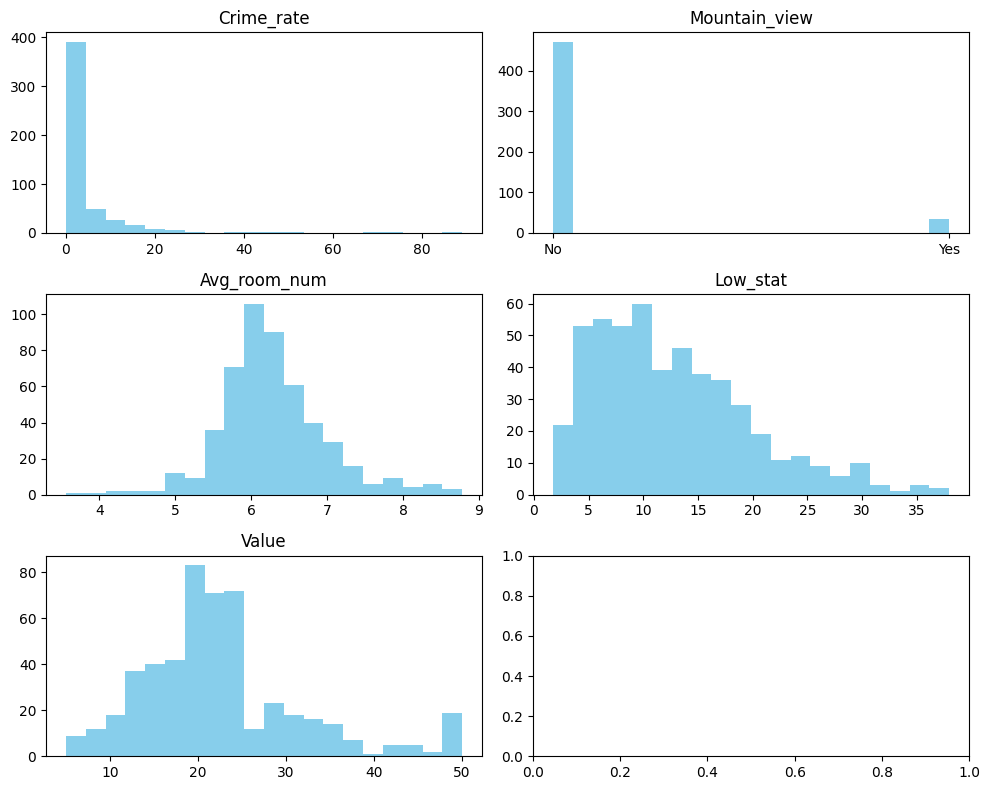

In [ ]:
columns = df.columns.tolist()

fig, axs = plt.subplots(3, 2, figsize = (10, 8))
axs = axs.flatten() # flattening for easy iteration

# Plot histograms in subpolts # Using for loop for efficiency
for i, column in enumerate(columns):
    axs[i].hist(df[column], bins = 20, color = 'skyblue')
    axs[i].set_title(column)

plt.tight_layout()

In [ ]:
# No missing values
# Unique entries for categorical variable
df['Mountain_view'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Encoding categorical variable
df['Mountain_view'] = df['Mountain_view'].map({'No': 0, 'Yes': 1})

### Explore Relationships

<Figure size 400x400 with 0 Axes>

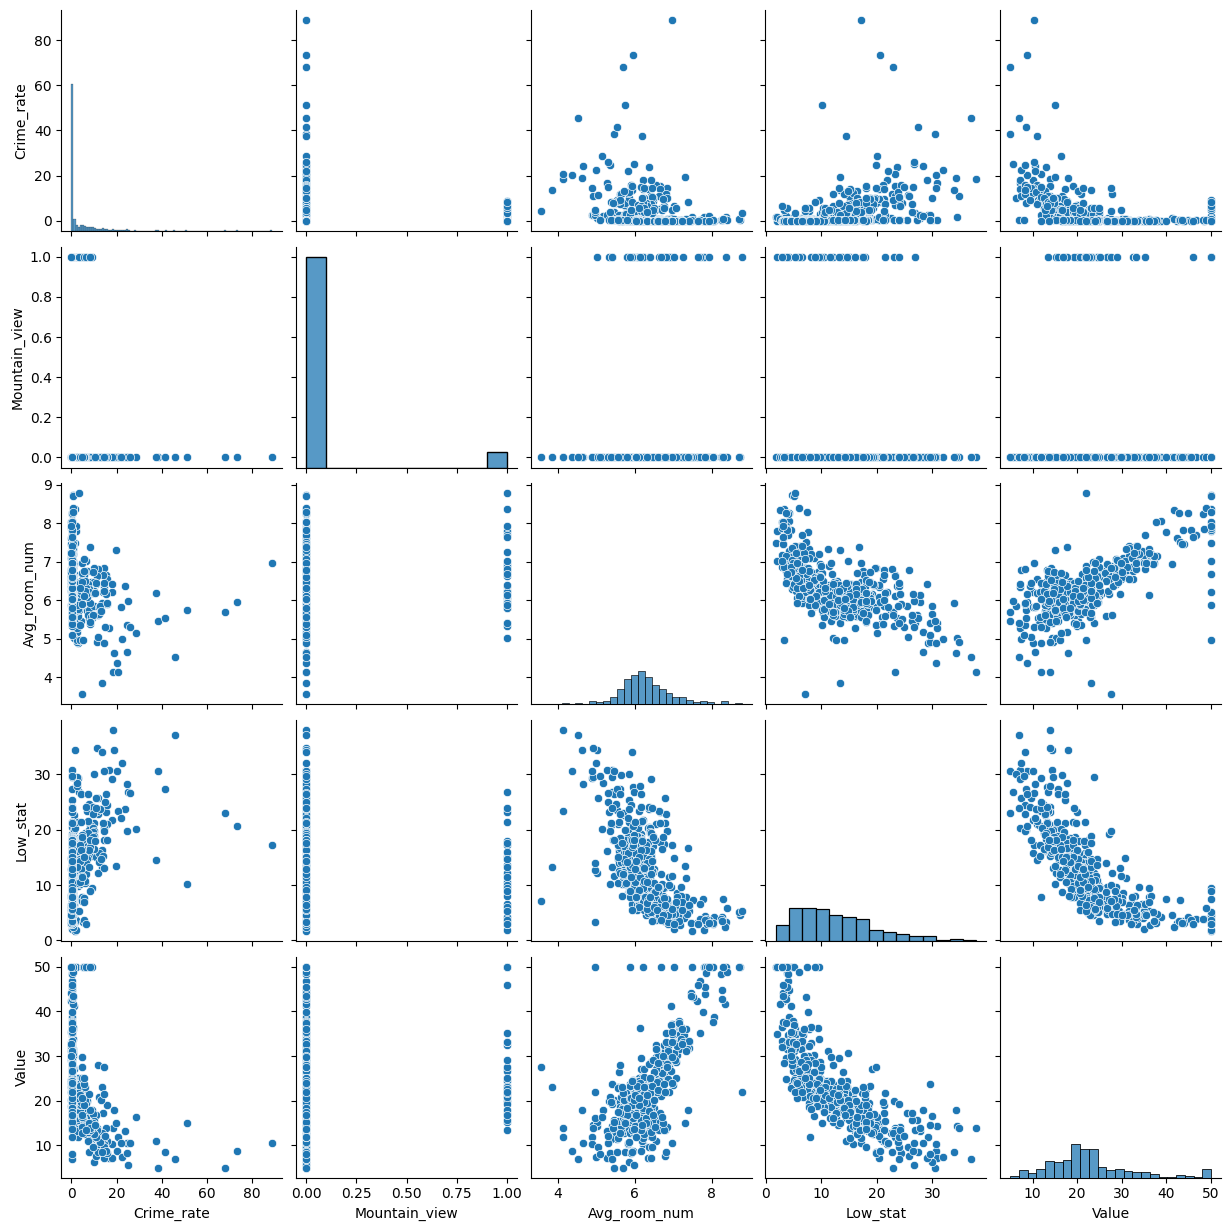

In [ ]:
# Pairplot for variable correlations
plt.figure(figsize=(4, 4))
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Matrix')

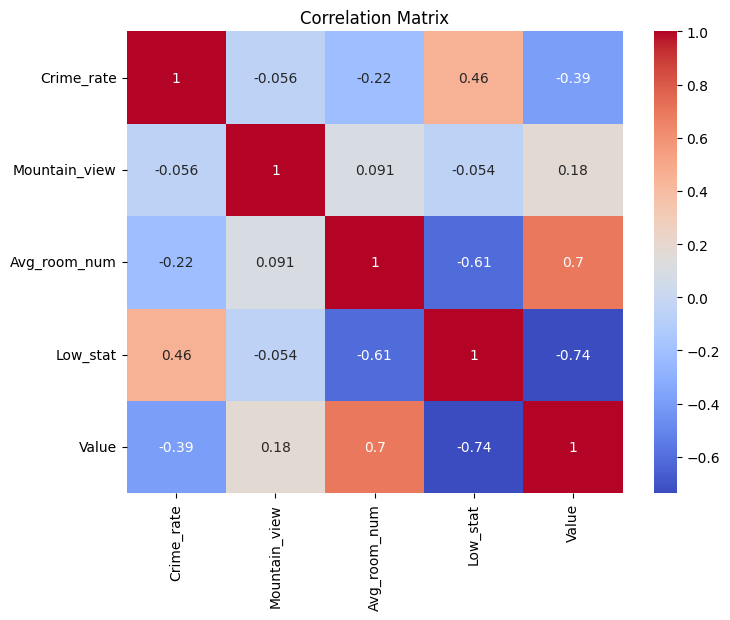

In [ ]:
# Setting figure margins
plt.figure(figsize=(8, 6))

# Heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

## Building the Multiple Linear Regression Model

In [ ]:
# Independent and dependent variables
X = df[['Crime_rate', 'Avg_room_num', 'Low_stat']]
y = df['Value']

In [ ]:
X.shape, y.shape

((506, 3), (506,))

In [ ]:
# Split the data into training (80%) and testing (20%) data subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit on training set
standard_scaler.fit(Xtrain)

# Apply feature scaling
Xtrain_standard_scaled = standard_scaler.transform(Xtrain)
Xtest_standard_scaled = standard_scaler.transform(Xtest)

In [ ]:
# create an empty linear regression model, give it an appropriate name
housing_model = LinearRegression()

# Fit on training data
housing_model.fit(Xtrain_standard_scaled,ytrain)

LinearRegression()

In [ ]:
print('Intercept: \n', housing_model.intercept_)
print('Coefficients: \n', housing_model.coef_)

Intercept: 
 22.6118811881188
Coefficients: 
 [-1.14125798  3.71439284 -4.13942085]


## Model Evaluation

In [ ]:
# First, we use our model to make predictions on the unseen data
y_pred = housing_model.predict(Xtest_standard_scaled)

In [ ]:
# Calculate R-squared, proportion of variance in median house value that can be explain by low_stat
R_sq = r2_score(ytest, y_pred)
print("R-squared is ", round(R_sq*100), "%")

R-squared is  52 %


Our R-squared value tells us that our independent variables explain 52% of variation in median values of homes. This indicates that our model's performance is poor. Granted, this is an improvement compared to our Simple Linear Regression model which had an R-squared of 43%. Another approach or a better set of features would be required to reliably predict median house values.